# PySolar 
#### Cassie Lumbrazo, using code from Danny Hogan
#### June 2022

In [1]:
from pysolar.solar import *

In [28]:
# import packages 
# %matplotlib inline
%matplotlib widget
# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

In [29]:
# Open the files, using 1minute here frist 
for1 = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/for1c_h.csv")

# Index by datetime 
for1.index = pd.DatetimeIndex(for1['datetime'])

# Drop the extra column
# for1 = for1.drop(columns=['datetime'])

# Create xarray dataset 
for1x = for1.to_xarray()

In [4]:
date=for1.datetime

# Code from Danny 
Here is an example for a time series. The most annoying thing is that you have to make your timeseries timezone aware or else it wont work...

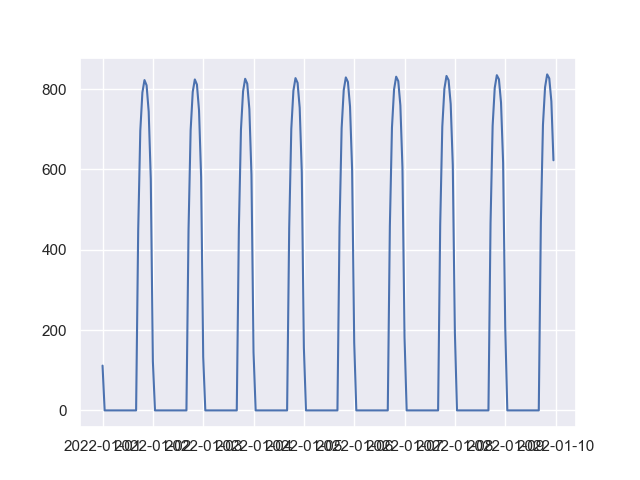

In [5]:
# %%
from pysolar.solar import *
import numpy as np
import datetime as dt


# %%
def clear_sky_radiation(lat, lon, date):
    altitude_deg = get_altitude(latitude_deg, longitude_deg, date)
    clear_sky_rad = radiation.get_radiation_direct(date, altitude_deg)
    return clear_sky_rad

# %%
latitude_deg = 47 
longitude_deg = -122 
dates = np.arange(dt.datetime(2022,1,1)  , dt.datetime(2022,1,10)  , dt.timedelta(hours=1)).astype(dt.datetime)

dates = dates
csr = []

for date in dates:
    date = date.replace(tzinfo=dt.timezone.utc)
    csr.append(clear_sky_radiation(latitude_deg,longitude_deg, date))


# %%
import matplotlib.pyplot as plt

plt.plot(dates, csr)

## Now, trying it with my site location and dates 

In [38]:
latitude_deg = 46.842668 
longitude_deg = 9.8360
dates = np.arange(dt.datetime(2021,1,1)  , dt.datetime(2021,6,1)  , dt.timedelta(hours=1)).astype(dt.datetime)

dates = dates
csr = []

for date in dates:
    date = date.replace(tzinfo=dt.timezone.utc)
    csr.append(clear_sky_radiation(latitude_deg,longitude_deg, date))

# plt.close()
# plt.plot(dates, csr)
# plt.show()

### Plot to compare with laret site solar data 

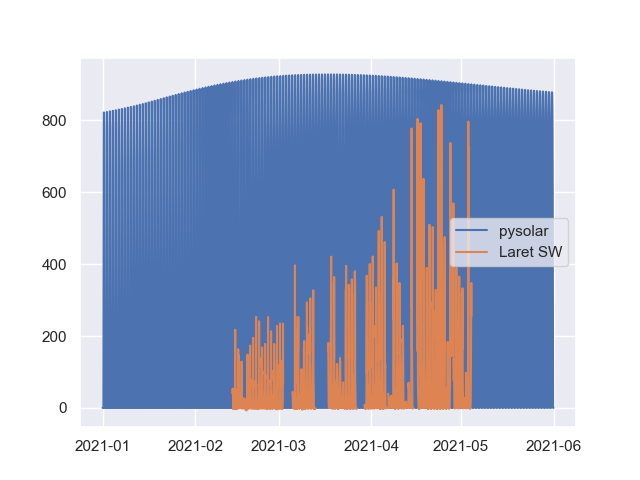

In [20]:
plt.close()
plt.plot(dates, csr)
plt.plot(for1.index, for1.SWR_Avg)
plt.legend(['pysolar', "Laret SW"])
plt.show()

## Save the potential pysolar radiation to a csv to use later for analysis 

In [39]:
# create dataframe and add pysolar data and dates
pysolar_df = pd.DataFrame()
pysolar_df['datetime']=dates
pysolar_df['pysolar']=csr

# convert to datetime and drop extra columns
pysolar_df.index = pd.DatetimeIndex(pysolar_df['datetime'])
pysolar_df = pysolar_df.drop(columns=['datetime'])
pysolar_df

,pysolar
datetime,
2021-01-01 00:00:00,0.000000e+00
2021-01-01 01:00:00,0.000000e+00
2021-01-01 02:00:00,0.000000e+00
2021-01-01 03:00:00,0.000000e+00
2021-01-01 04:00:00,0.000000e+00
...,...
2021-05-31 19:00:00,8.225599e-07
2021-05-31 20:00:00,0.000000e+00
2021-05-31 21:00:00,0.000000e+00


### A little cleaning

In [47]:
# pysolar_df.pysolar = pysolar_df.pysolar.mask(pysolar_df.pysolar < 0,0)
# pysolar_df.pysolar = pysolar_df.pysolar.mask(pysolar_df.pysolar > 3000) 

pysolar_df.pysolar.mask(pysolar_df.pysolar < 0.0, 0, inplace=True)
pysolar_df.pysolar.mask(pysolar_df.pysolar > 3000, inplace=True) 
pysolar_df = pysolar_df.round(0).astype(int)

In [49]:
pysolar_df.pysolar.loc['2021-02-26T13:00:00':'2021-02-26T18:00:00']

datetime
2021-02-26 13:00:00    901
2021-02-26 14:00:00    852
2021-02-26 15:00:00    744
2021-02-26 16:00:00    476
2021-02-26 17:00:00      0
2021-02-26 18:00:00      0
Name: pysolar, dtype: int32

In [50]:
# Write the dataframe to a new dataset for use later 
pysolar_df.to_csv('/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/pysolar.csv')

### Open it to make sure it's good

In [51]:
pysolar = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/pysolar.csv")
pysolar.index = pd.DatetimeIndex(pysolar['datetime'])
pysolar = pysolar.drop(columns=['datetime'])
pysolarx = pysolar.to_xarray()
pysolar.head()

,pysolar
datetime,
2021-01-01 00:00:00,0
2021-01-01 01:00:00,0
2021-01-01 02:00:00,0
2021-01-01 03:00:00,0
2021-01-01 04:00:00,0


<AxesSubplot:xlabel='datetime'>

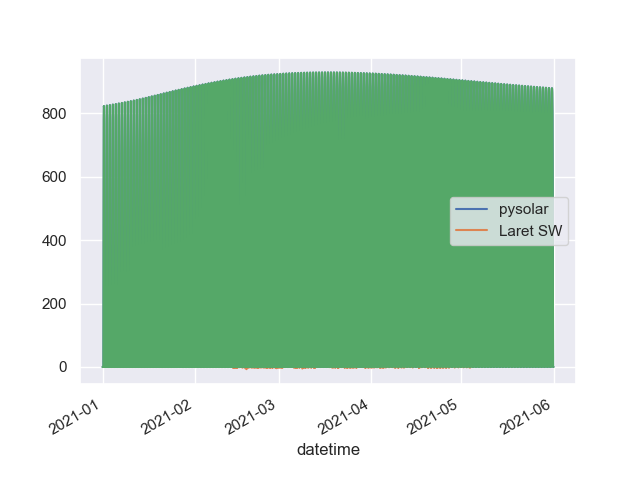

In [12]:
pysolar.pysolar.plot()